In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

model = linear_regression(1, 10)
x = torch.tensor([[1.0]])
print(model)
print(x)
print(model(x))


linear_regression(
  (linear): Linear(in_features=1, out_features=10, bias=True)
)
tensor([[1.]])
tensor([[ 0.3089, -0.5028,  1.8616, -0.1331,  0.2839,  0.1578,  0.5762,  1.4668,
          1.4975,  0.3003]], grad_fn=<AddmmBackward0>)


In [21]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0, -1.0], [1.0, -1.0]])
        self.b = torch.tensor([[1.0, -1.0]])
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()


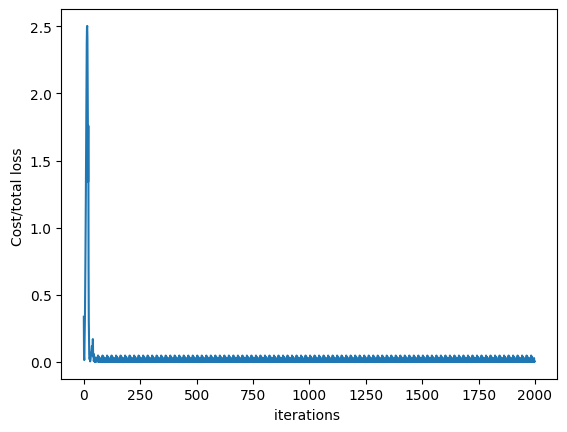

In [22]:
data_set = Data()
loss = nn.MSELoss()
model = linear_regression(2, 2)
optim = torch.optim.SGD(model.parameters(), lr=0.1)
training_data = DataLoader(dataset=data_set, batch_size=1)
epochs = 100

LOSS = []

for epoch in range(epochs):
    for x, y in training_data:
        yhat = model(x)
        loss_res = loss(yhat, y)
        LOSS.append(loss_res.item())
        optim.zero_grad()
        loss_res.backward()
        optim.step()

plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

        
